In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline


In [13]:
df = pd.read_csv('insurance.csv', index_col=False)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Scatterplots

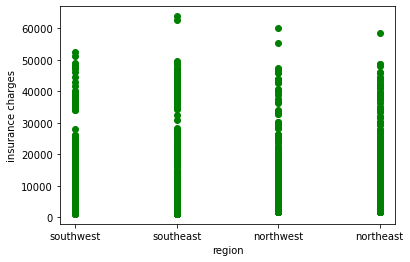

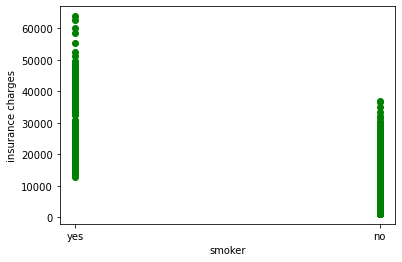

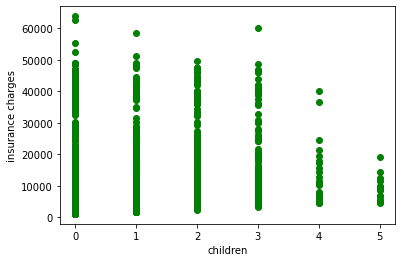

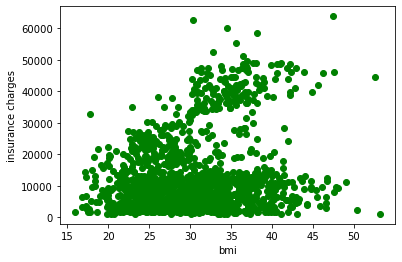

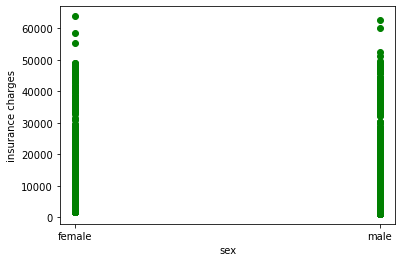

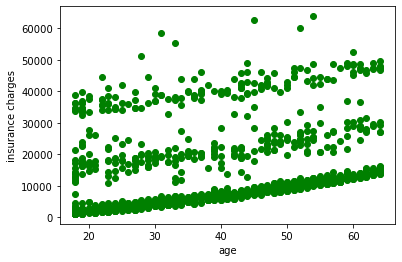

In [17]:
#age vs insurance charges
plot(df['region'],df['charges'],marker='o',color='green',linestyle='None')
xlabel('region')
ylabel('insurance charges')
show()

#sex vs charges
plot(df['smoker'],df['charges'],marker='o',color='green',linestyle='None')
xlabel('smoker')
ylabel('insurance charges')
show()

#children vs charges
plot(df['children'],df['charges'],marker='o',color='green',linestyle='None')
xlabel('children')
ylabel('insurance charges')
show()

#bmi vs charges
plot(df['bmi'],df['charges'],marker='o',color='green',linestyle='None')
xlabel('bmi')
ylabel('insurance charges')
show()

#sex vs charges
plot(df['sex'],df['charges'],marker='o',color='green',linestyle='None')
xlabel('sex')
ylabel('insurance charges')
show()

#age vs charges
plot(df['age'],df['charges'],marker='o',color='green',linestyle='None')
xlabel('age')
ylabel('insurance charges')
show()

Regression: all variables

In [32]:
y,X = dmatrices('charges ~ age+sex+bmi+children+smoker+region', data=df,return_type='dataframe')

model=sm.OLS(y,X)
result=model.fit()
print(result.summary())
# pd.get_dummies(df)

# plot(y,X,marker='o',color='green',linestyle='None')
# xlabel('all')
# ylabel('insurance charges')
# show()

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:04:36   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

Backwards regression: reject p-vales > 0.05

In [34]:
y, X = dmatrices('charges ~ age+bmi+children+smoker+region', data=df,return_type='dataframe')

model=sm.OLS(y, X)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:05:06   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.199e+04    

Backwards regression w/o region: reject p-vales > 0.05

In [36]:
y, X = dmatrices('charges ~ age+bmi+children+smoker', data=df,return_type='dataframe')

model=sm.OLS(y, X)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:07:35   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    941.984    -12.848

# LOGISITIC REGRESSION
Rianna Patel

In [37]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
df = pd.read_csv('insurance.csv', index_col=False)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'number of times charge occured')

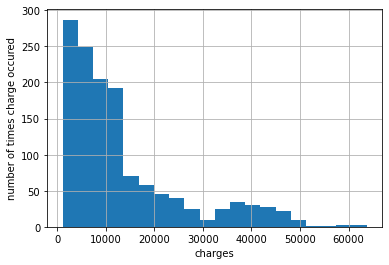

In [58]:
df['charges'].hist(bins=20)
xlabel('charges')
ylabel('number of times charge occured')

In [60]:
print(df['charges'].median())
print(df['charges'].mean())

9382.033
13270.422265141257


CREATE TARGET GROUP

In [94]:

##Finds top 30% os dataset charges
high_risk_charges = df.sort_values('charges',ascending=False).head(round(0.3*len(df)))
# high_risk_charges.min() = 13822.803

df['high_risk'] = 0.0
df['high_risk'][df['charges'] > 13822.803] = 1.0
df['high_risk'].value_counts()
#0.0 = LOW RISK
#1.0 = HIGH RISK



<ipython-input-94-d5797de9b31b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_risk'][df['charges'] > 13822.803] = 1.0


0.0    938
1.0    400
Name: high_risk, dtype: int64

In [164]:

Y, X = dmatrices('high_risk ~ 0+age+sex+bmi+children+smoker+region', data=df,return_type='dataframe')
y = Y['high_risk'].values





CROSSTABS

In [171]:
age_vs_highrisk = pd.crosstab(df['age'], df['high_risk'])
# print(age_vs_highrisk)
#doesn't look like a significant factor

total_age = age_vs_highrisk.apply(sum)
age_vs_highrisk /= total_age
age_vs_highrisk

##Group based on what we consider young, middle age, old???
#18 - 29, etc

high_risk,0.0,1.0
age,,
18,0.060768,0.0300
19,0.049041,0.0550
20,0.020256,0.0250
21,0.025586,0.0100
22,0.023454,0.0150
23,0.019190,0.0250
24,0.020256,0.0225
25,0.021322,0.0200
26,0.025586,0.0100


<AxesSubplot:xlabel='age'>

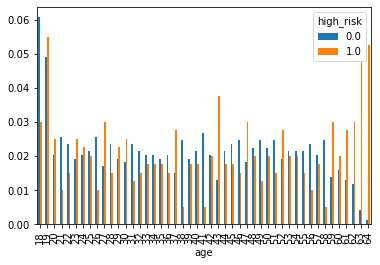

In [148]:
age_vs_highrisk.plot(kind = 'bar')

In [172]:
sex_vs_highrisk = pd.crosstab(df['sex'], df['high_risk'])
# sex_vs_highrisk


total_sex = sex_vs_highrisk.apply(sum)
sex_vs_highrisk /= total_sex
sex_vs_highrisk

#doesn't look like a significant factor

high_risk,0.0,1.0
sex,,
female,0.506397,0.4675
male,0.493603,0.5325


<AxesSubplot:xlabel='sex'>

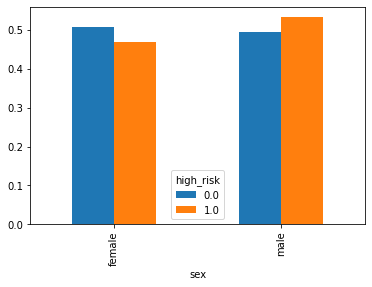

In [151]:
sex_vs_highrisk.plot(kind = 'bar')

In [165]:
bmi_vs_highrisk = pd.crosstab(df['bmi'], df['high_risk'])
# bmi_vs_highrisk

total_bmi = bmi_vs_highrisk.apply(sum)
bmi_vs_highrisk /= total_bmi
#bmi_vs_highrisk

##Group bmi's? - could be difficult because good/bad bmi's depend on age

###cdc grouping - underweight, heallthy, obease

high_risk,0.0,1.0
bmi,,
15.960,0.001066,0.0000
16.815,0.002132,0.0000
17.195,0.000000,0.0025
17.290,0.003198,0.0000
17.385,0.001066,0.0000
...,...,...
48.070,0.001066,0.0000
49.060,0.001066,0.0000
50.380,0.001066,0.0000


<AxesSubplot:xlabel='bmi'>

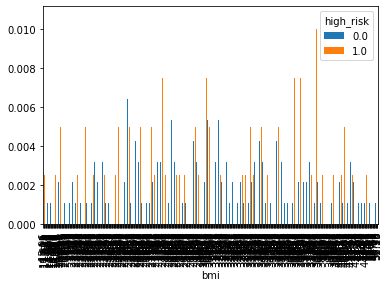

In [154]:
bmi_vs_highrisk.plot(kind = 'bar')

In [157]:
children_vs_highrisk = pd.crosstab(df['children'], df['high_risk'])
# children_vs_highrisk
#no indication

total_children = children_vs_highrisk.apply(sum)
children_vs_highrisk /= total_children
children_vs_highrisk

high_risk,0.0,1.0
children,,
0,0.439232,0.4050
1,0.252665,0.2175
2,0.169510,0.2025
3,0.104478,0.1475
4,0.017058,0.0225
5,0.017058,0.0050


<AxesSubplot:xlabel='children'>

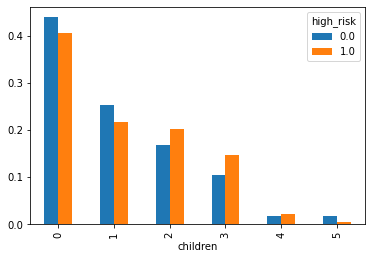

In [158]:
children_vs_highrisk.plot(kind = 'bar')

#no indication
#issue with sample - very few families w/ > 3 children

In [159]:
smoker_vs_highrisk = pd.crosstab(df['smoker'], df['high_risk'])
# smoker_vs_highrisk
#yes indicates high risk

total_smoker = smoker_vs_highrisk.apply(sum)
smoker_vs_highrisk /= total_smoker
smoker_vs_highrisk

high_risk,0.0,1.0
smoker,,
no,0.997868,0.32
yes,0.002132,0.68


<AxesSubplot:xlabel='smoker'>

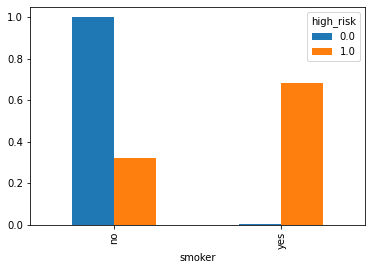

In [160]:
smoker_vs_highrisk.plot(kind = 'bar')

In [161]:
region_vs_highrisk = pd.crosstab(df['region'], df['high_risk'])
# region_vs_highrisk
#no indication

total_region = region_vs_highrisk.apply(sum)
region_vs_highrisk /= total_region
region_vs_highrisk

high_risk,0.0,1.0
region,,
northeast,0.236674,0.2550
northwest,0.248401,0.2300
southeast,0.252665,0.3175
southwest,0.262260,0.1975


<AxesSubplot:xlabel='region'>

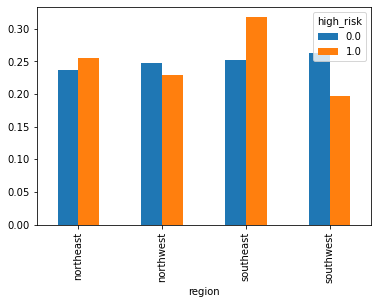

In [122]:
region_vs_highrisk.plot(kind = 'bar')

SPLIT INTO TRAINING AND TESTING DATA SETS

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)





FIT CLASSIFIER

In [134]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, Y_train)


/Users/riannapatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/riannapatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print (metrics.accuracy_score(Y_train, prediction_train))

#91% ACCURACY

0.907051282051282


COMPARE ACCURACY AGAINST BASELINE

In [136]:
print('Number of positive examples =', len(Y_train[Y_train == 1]))
print('Number of negative examples =', len(Y_train[Y_train == 0]))

Number of positive examples = 936
Number of negative examples = 936


In [ ]:
###^in lecture said we may get the "TOTAL NO. of ITERATIONS REACHED LIMIT." error and go with whatever the model gives

In [162]:
negative_test_examples = len(Y_test[Y_test == 0])
total_test_examples = len(Y_test)

print('Number of examples where baseline is correct =', negative_test_examples)
print('Baseline accuracy =', negative_test_examples * 1.0/total_test_examples)


##Might not need - 100% accuracy

Number of examples where baseline is correct = 402
Baseline accuracy = 1.0


FEATURE WEIGHTS

In [140]:
model.coef_

array([[-0.89467069, -1.14033723,  5.604402  ,  0.07526318, -0.09851754,
        -0.31142584,  0.03985408,  0.01721704,  0.09732734]])

In [167]:
model.summary

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [141]:
model.intercept_

#not important

array([-3.17616633])

In [142]:
weights = Series(model.coef_[0],
                index = X.columns.values)
weights.sort_values()

sex[male]             -1.140337
sex[female]           -0.894671
region[T.southwest]   -0.311426
region[T.southeast]   -0.098518
bmi                    0.017217
age                    0.039854
region[T.northwest]    0.075263
children               0.097327
smoker[T.yes]          5.604402
dtype: float64

#high positive weight = more likely to be high risk high 
#negative weight = more likely to be low risk

#shows that sex has no effect, southwest and southeast regions has no relative effect, but northwest is more likely to have be high risk. Smoker has highest impact on being high risk.